# Gredient Decent

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from matplotlib import pyplot as plt
from copy import deepcopy
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
%matplotlib inline

## Gradient
$$
{\displaystyle \nabla_{x} f(p)={\begin{bmatrix}{\frac {\partial f}{\partial x_{1}}}(p)\\\vdots \\{\frac {\partial f}{\partial x_{n}}}(p)\end{bmatrix}} \in \mathbb{R}^{n}.}
$$


(200,) (200,)
(200, 200) (200, 200)
(2, 200, 200)


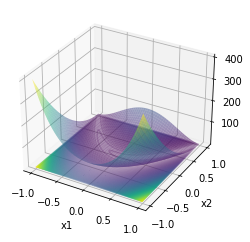

In [2]:
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
print(x1.shape, x2.shape)
x1, x2 = np.meshgrid(x1, x2)  # outer product by ones_like(x1) or ones_like(x2)
print(x1.shape, x2.shape)
x = np.concatenate((x1[np.newaxis, :], x2[np.newaxis, :]), axis=0)
print(x.shape)

def f(x):
    f = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) **2    
    return f

y = f(x)

ax = plt.gca(projection='3d')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.plot_surface(x1, x2, y, cmap=cm.viridis, alpha=0.5)
ax.contour(x1, x2, y, zdir='z', offset=0, levels=300, alpha=0.2)

In [3]:
def gradient(f, x, epsilon=1e-7):
    """ numerically find gradients. 
    x: shape=[n] """
    grad = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        h = np.zeros_like(x, dtype=float)
        h[i] = epsilon
        grad[i] = (f(x + h) - f(x - h)) / (2 * h[i])
    return grad



In [4]:
init = np.array([-0.5, 0.5])
print(f(init))
print(gradient(f, x=init))


8.5
[47. 50.]


(200,) (200,)
(200, 200) (200, 200)
(2, 200, 200)


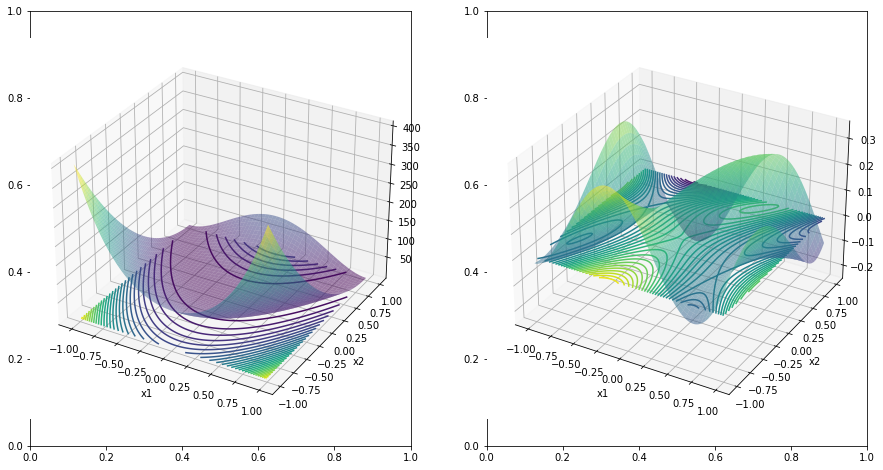

In [5]:
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
print(x1.shape, x2.shape)
x1, x2 = np.meshgrid(x1, x2)  # outer product by ones_like(x1) or ones_like(x2)
print(x1.shape, x2.shape)
x = np.concatenate((x1[np.newaxis, :], x2[np.newaxis, :]), axis=0)
print(x.shape)

def f(x):
    f1 = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) **2
    f2 = np.sin((x[0] ** 2) / 2 - (x[1] ** 2) / 4 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))    
    f = np.concatenate((f1[np.newaxis, ...], f2[np.newaxis, ...]), axis=0)
    return f


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.plot_surface(x[0], x[1], f(x)[0], cmap=cm.viridis, alpha=0.5)
ax1.contour(x[0], x[1], f(x)[0], zdir='z', offset=0, levels=30)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.plot_surface(x[0], x[1], f(x)[1], cmap=cm.viridis, alpha=0.5)
ax2.contour(x[0], x[1], f(x)[1], zdir='z', offset=0, levels=30)

## Gradient Decent Method
$$
\mathbf{x}_{i + 1} = \mathbf{x}_i - \gamma \nabla f(\mathbf{x}_i)
$$

In [6]:
def grad_decent(f, init, step, lr=0.001, history=False):
    x = init
    memo = [x]
    for i in range(step):
        grad = gradient(f, x)        
        x = x - lr * grad
        if history: memo.append(x)
    if not history: return x
    return x, np.array(list(zip(*memo)))

### example 1

(200,) (200,)
(200, 200) (200, 200)
(2, 200, 200)
(200, 200) (200, 200) (200, 200)
initial_value: [-0.5  0.5]
optimal point: [0.92 0.85]
optimal value: 0.006316436212378089


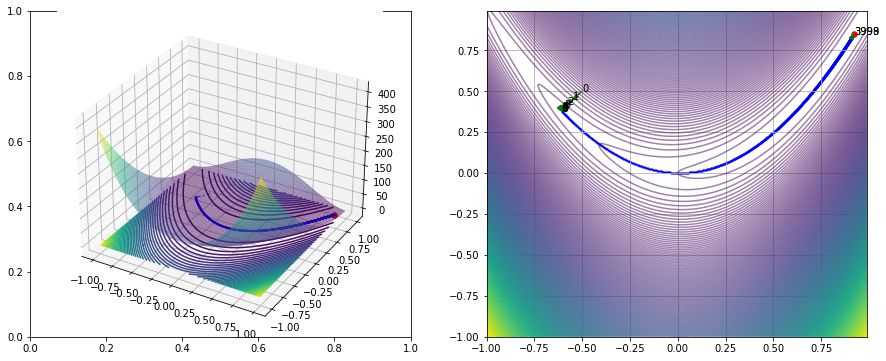

In [7]:
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
print(x1.shape, x2.shape)
x1, x2 = np.meshgrid(x1, x2)  # outer product by ones_like(x1) or ones_like(x2)
print(x1.shape, x2.shape)
x = np.concatenate((x1[np.newaxis, :], x2[np.newaxis, :]), axis=0)
print(x.shape)

def f(x):
    f = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) **2
    return f
y = np.array(f(x))
print(x1.shape, x2.shape, y.shape)

n_step = 4000
ans, history = grad_decent(f, init, step=n_step, lr=0.001, history=True)

print("initial_value: {}".format(history[:,0]))
print("optimal point: {}".format(ans))
print("optimal value: {}".format(f(ans)))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(x1, x2, y, cmap=cm.viridis, alpha=0.5)
ax1.contour(x1, x2, y, zdir='z', offset=f(ans), levels=50)
ax1.scatter(history[0, :], history[1, :], [f(vec) for vec in history.T], s=1, color='b', alpha=0.5)
ax1.scatter(ans[0], ans[1], f(ans), s=30, color='red')

ax2.contour(x1, x2, y, levels=500, cmap=cm.viridis, alpha=0.5)
ax2.scatter(history[0, :], history[1, :], s=1.0, color='b', alpha=0.5)
order = list(range(len(history[0])))
for i, txt in enumerate(order):
    if 0 <= i < 10 or (n_step - 3 < i < n_step):        
        ax2.annotate(txt, (history[0][i], history[1][i]))
        dx = history[0][i+1] - history[0][i]
        dy = history[1][i+1] - history[1][i]
        ax2.arrow(history[0][i], history[1][i], dx, dy,
                  head_width=0.02, length_includes_head=True, color='g')
ax2.scatter(ans[0], ans[1], s=30, color='red')
# ax2.set_xlim(-0.8, 0.8)
# ax2.set_ylim(-0.1, 1.1)
ax2.grid('--')

plt.show()

Text(0, 0.5, 'f - f*')

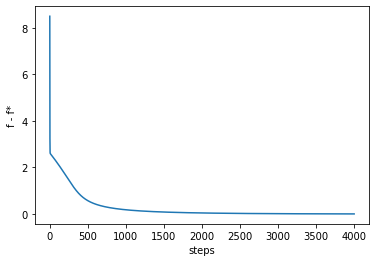

In [8]:
fstar = f(ans)
fvalues = [f(vec) for vec in history.T]
order = list(range(len(history[0])))
gaps = fvalues - fstar
plt.plot(order, gaps)
plt.gca().set_xlabel('steps')
plt.gca().set_ylabel('f - f*')

### example 2

(200,) (200,)
(200, 200) (200, 200)
(2, 200, 200)
(200, 200) (200, 200) (200, 200)
initial_value: [-0.5  0.5]
optimal point: [0.17 1.54]
optimal value: -0.6479842881229231


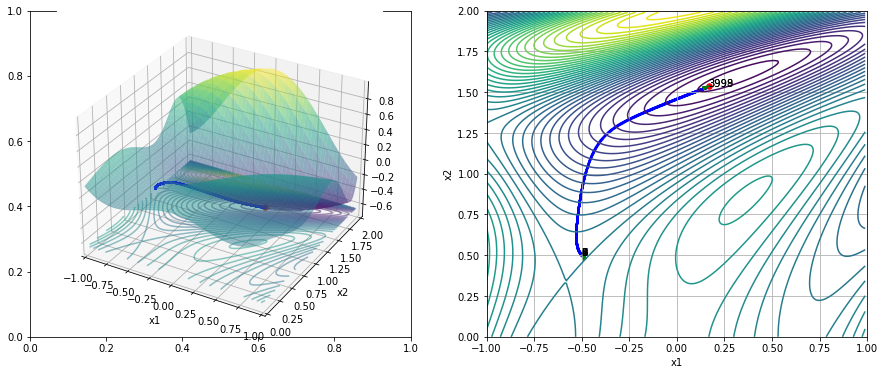

In [9]:
def f(x):
    f = np.sin((x[0] ** 2) / 2 - (x[1] ** 2) / 4 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))            
    return f

x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(0, 2, 0.01)
print(x1.shape, x2.shape)
x1, x2 = np.meshgrid(x1, x2)  # outer product by ones_like(x1) or ones_like(x2)
print(x1.shape, x2.shape)
x = np.concatenate((x1[np.newaxis, :], x2[np.newaxis, :]), axis=0)
print(x.shape)

y = np.array(f(x))
print(x1.shape, x2.shape, y.shape)


n_step = 4000
ans, history = grad_decent(f, init, step=n_step, lr=0.001, history=True)

print("initial_value: {}".format(history[:,0]))
print("optimal point: {}".format(ans))
print("optimal value: {}".format(f(ans)))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.cla()
ax2.cla()

ax1.plot_surface(x1, x2, y, cmap=cm.viridis, alpha=0.5)
ax1.contour(x1, x2, y, zdir='z', offset=f(ans), levels=50, alpha=0.5)
ax1.scatter(history[0, :], history[1, :], [f(vec) for vec in history.T], s=2, color='b',alpha=0.5)
ax1.scatter(ans[0], ans[1], f(ans), s=30, color='red')

ax2.contour(x1, x2, y, levels=50, cmap=cm.viridis, alpha=1)
ax2.scatter(history[0, :], history[1, :], s=1.0, color='b', alpha=0.5)
order = list(range(len(history[0])))
for i, txt in enumerate(order):
    if 0 <= i < 10 or (n_step - 3 < i < n_step):        
        ax2.annotate(txt, (history[0][i], history[1][i]))
        dx = history[0][i+1] - history[0][i]
        dy = history[1][i+1] - history[1][i]
        ax2.arrow(history[0][i], history[1][i], dx, dy,
                  head_width=0.02, length_includes_head=True, color='g')
ax2.scatter(ans[0], ans[1], s=30, color='red')
ax2.grid('--')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(0, 2)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlim(-1, 1)
ax2.set_ylim(0, 2)

plt.show()

Text(0, 0.5, 'f - f*')

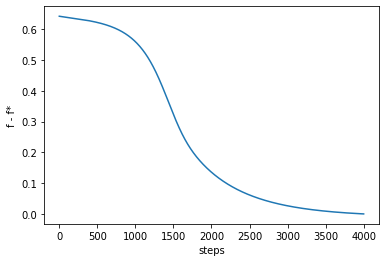

In [10]:
fstar = f(ans)
fvalues = [f(vec) for vec in history.T]
order = list(range(len(history[0])))
gaps = fvalues - fstar
plt.plot(order, gaps)
plt.gca().set_xlabel('steps')
plt.gca().set_ylabel('f - f*')

###  non linear system equation with gradient decent
$$ 
f_{1}(x_{1}, \cdots, x_{n}) = 0 \\
\vdots \\
f_{m}(x_{1}, \cdots, x_{n}) = 0 \\
$$

를 풀기 위해서 gradient decent를 적용해보자.

다변수 벡터함수 $G: \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$을 아래와 같이 설정하고
$$
\mathbf {G} = \begin{bmatrix} f_{1} & \cdots & f_{m}
\end{bmatrix}
$$

G 에 대해서 squard sum으로 objective function을 만들면 아래와 같다.
$$
F(\mathbf {x})={\frac {1}{2}}G^{\mathrm {T} }(\mathbf {x} )G(\mathbf {x} ) = \frac{1}{2}[(f_{1})^2 + \cdots + (f_{m})^2]
$$

위의 식을 gradient decent로 업데이트 하면 아래와 같은 식이 된다.
$$
\begin{align}
\mathbf {x} ^{(i+1)}&=\mathbf {x}^{i} -\gamma \nabla F(\mathbf {x}^{i} ) \nonumber\\
&=\mathbf {x}^{i} -\gamma J_{G}(\mathbf {x}^{i} )^{\mathrm {T} }G(\mathbf {x}^{i} )
\end{align}
$$

initial_value: [0. 0.]
optimal point: [0.8  0.64]
optimal value: -0.057777184571374506


Text(0, 0.5, 'f - f*')

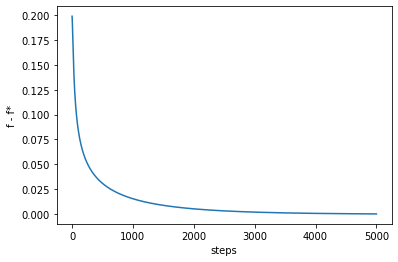

In [11]:
init = [0, 0]  # inital state
def G(x):
    g1 = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) **2
    g2 = np.sin((x[0] ** 2) / 2 - (x[1] ** 2) / 4 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))      
    return np.array([g1, g2])

def F(x):
    """ x: np.array, shape=[3] """
    return np.dot(G(x).T, G(x)) / 2

n_step = 5000
ans, history = grad_decent(F, init, step=n_step, lr=0.01, history=True)

print("initial_value: {}".format(history[:,0]))
print("optimal point: {}".format(ans))
print("optimal value: {}".format(f(ans)))

fstar = f(ans)
fvalues = [f(vec) for vec in history.T]
order = list(range(len(history[0])))
gaps = fvalues - fstar
plt.plot(order, gaps)
plt.gca().set_xlabel('steps')
plt.gca().set_ylabel('f - f*')

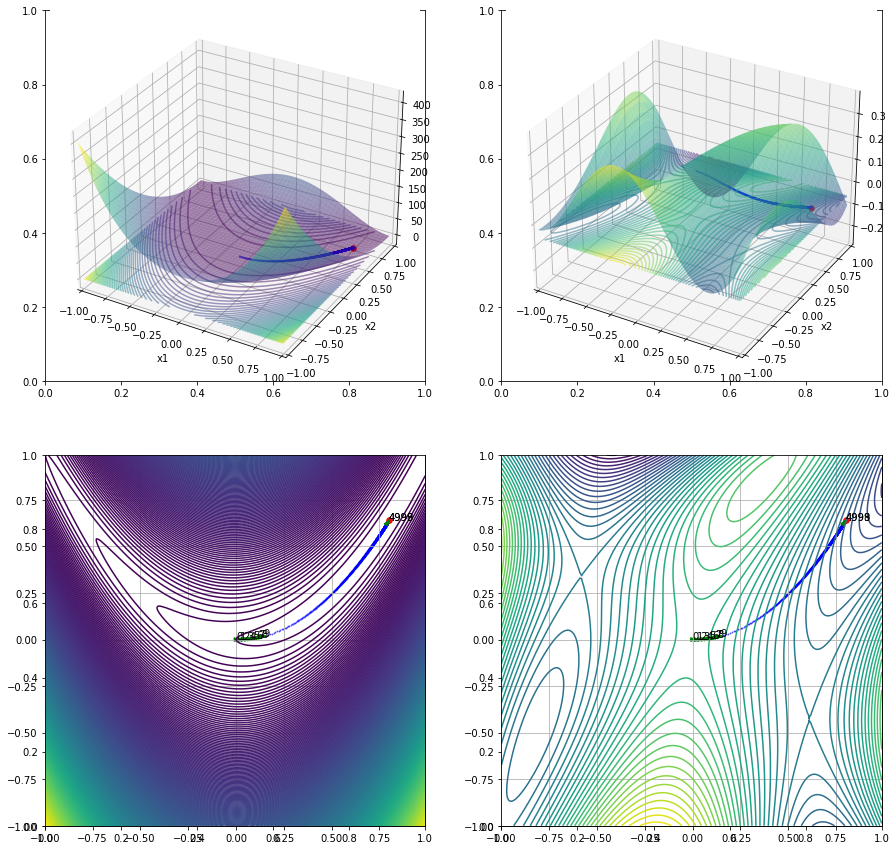

In [12]:
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)  # outer product by ones_like(x1) or ones_like(x2)
x = np.concatenate((x1[np.newaxis, :], x2[np.newaxis, :]), axis=0)

y1, y2 = np.array(G(x))
y1star, y2star = G(ans)
y1p = G(history)[0,:]
y2p = G(history)[1,:]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.cla()

ax1.plot_surface(x1, x2, y1, cmap=cm.viridis, alpha=0.5)
ax1.contour(x1, x2, y1, zdir='z', offset=y1star, levels=50, alpha=0.5)
ax1.scatter(history[0, :], history[1, :], y1p, s=2, color='b',alpha=0.5)
ax1.scatter(ans[0], ans[1], y1star, s=30, color='red')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.cla()

ax2.plot_surface(x1, x2, y2, cmap=cm.viridis, alpha=0.5)
ax2.contour(x1, x2, y2, zdir='z', offset=y2star, levels=50, alpha=0.5)
ax2.scatter(history[0, :], history[1, :], y2p, s=2, color='b',alpha=0.5)
ax2.scatter(ans[0], ans[1], y2star, s=30, color='red')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)

ax3 = fig.add_subplot(2, 2, 3)
ax3.cla()
ax3.contour(x1, x2, y1, levels=500, cmap=cm.viridis, alpha=1)
ax3.scatter(history[0, :], history[1, :], s=1.0, color='b', alpha=0.5)
order = list(range(len(history[0])))
for i, txt in enumerate(order):
    if 0 <= i < 10 or (n_step - 3 < i < n_step):        
        ax3.annotate(txt, (history[0][i], history[1][i]))
        dx = history[0][i+1] - history[0][i]
        dy = history[1][i+1] - history[1][i]
        ax3.arrow(history[0][i], history[1][i], dx, dy,
                  head_width=0.02, length_includes_head=True, color='g')
ax3.scatter(ans[0], ans[1], s=30, color='red')
ax3.grid('--')

ax4 = fig.add_subplot(2, 2, 4)
ax4.cla()
ax4.contour(x1, x2, y2, levels=50, cmap=cm.viridis, alpha=1)
ax4.scatter(history[0, :], history[1, :], s=1.0, color='b', alpha=0.5)
order = list(range(len(history[0])))
for i, txt in enumerate(order):
    if 0 <= i < 10 or (n_step - 3 < i < n_step):        
        ax4.annotate(txt, (history[0][i], history[1][i]))
        dx = history[0][i+1] - history[0][i]
        dy = history[1][i+1] - history[1][i]
        ax4.arrow(history[0][i], history[1][i], dx, dy,
                  head_width=0.02, length_includes_head=True, color='g')
ax4.scatter(ans[0], ans[1], s=30, color='red')
ax4.grid('--')